In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### 0. Helpers

In [39]:
def list_all_files(directory, tags=[]):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.csv'):
                full_path = os.path.join(root, file)
                tags_count = 0
                for tag in tags:
                    if tag.lower() in full_path.lower():
                        tags_count += 1
                if tags_count == len(tags):
                    csv_files.append(full_path)
    return sorted(csv_files)

def get_models(paths):
    return [path.split('/')[-2] for path in paths]

def load_csv_data(csv_files):
    """Load multiple CSV files into a list of DataFrames."""
    return [pd.read_csv(file) for file in csv_files]

def plot_accuracy_bar(df_list, labels):
    """Plot overall accuracy as a bar plot for multiple experiments."""
    accuracies = []

    for df in df_list:
        correct = (df['pred'] == df['true']).sum()
        total = len(df)
        accuracy = correct / total
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.bar(labels, accuracies, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Overall Accuracy for Multiple Experiments')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

def plot_confusion_matrices(df_list, labels):
    """Plot confusion matrices for multiple experiments."""
    for df, label in zip(df_list, labels):
        cm = confusion_matrix(df['true'], df['pred'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - {label}')
        plt.show()

def compute_classification_metrics(df_list, labels):
    """Compute accuracy, precision, recall, and F1-score for each model and return as DataFrame."""
    metrics = []

    for df, label in zip(df_list, labels):
        precision = precision_score(df['true'], df['pred'], zero_division=0, average="macro")
        recall = recall_score(df['true'], df['pred'], zero_division=0, average="macro")
        f1 = f1_score(df['true'], df['pred'], zero_division=0, average="macro")
        accuracy = accuracy_score(df['true'], df['pred'])

        metrics.append({
            'Model': label,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

def plot_subplots(df_list, labels, metrics=('train_loss', 'val_accuracy'), figsize=(14, 5), title=""):
    """Plot multiple CSVs with separate subplots for each metric."""
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for df, label in zip(df_list, labels):
        axes[0].plot(df[metrics[0]], label=label, marker='o')
        axes[1].plot(df[metrics[1]], label=label, marker='x')

    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)

    axes[1].set_title('Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].grid(True)

    for ax in axes:
        ax.legend()

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

#### 1. Train metrics

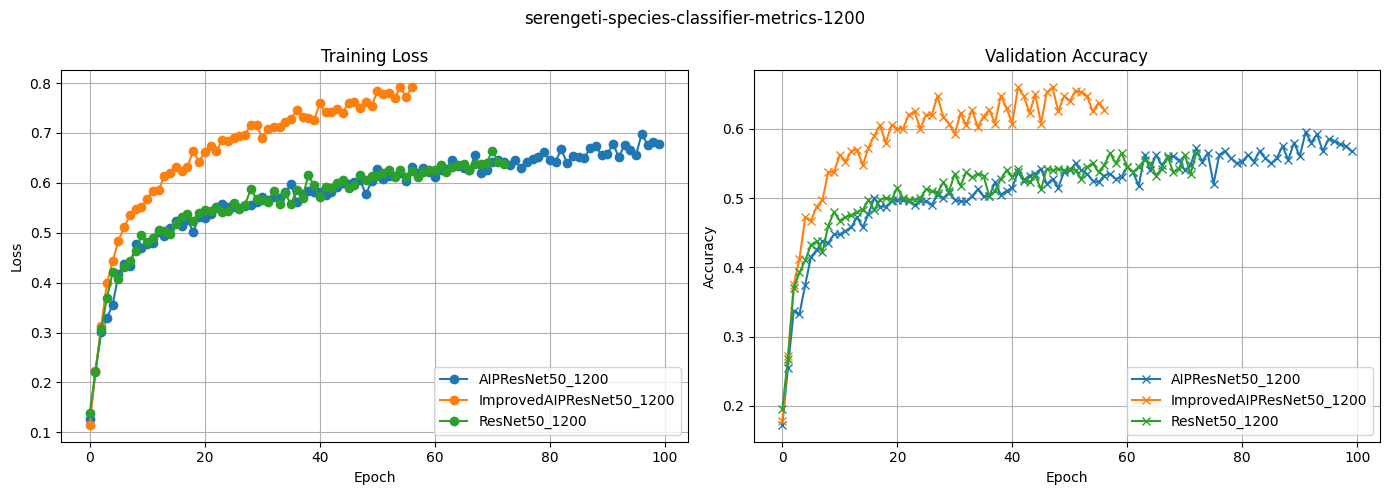

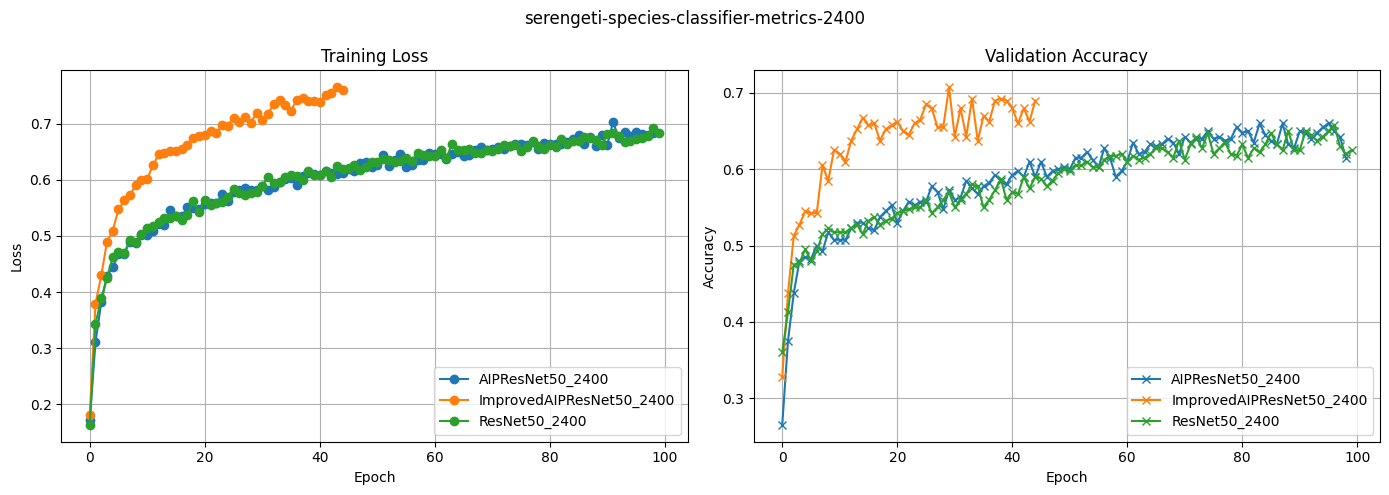

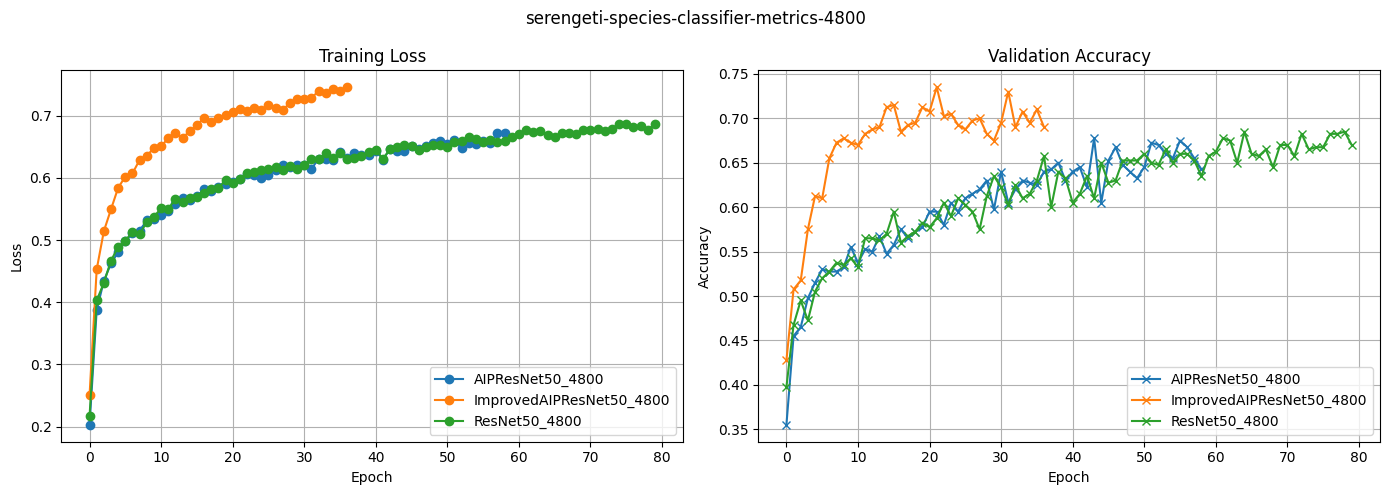

In [41]:
tags = ["serengeti", "species-classifier", "metrics", "1200"]
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", tags)
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels,  metrics=('train_accuracy', 'val_accuracy'), title="-".join(tags))

tags = ["serengeti", "species-classifier", "metrics", "2400"]
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["serengeti", "species-classifier", "metrics", "2400"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels,  metrics=('train_accuracy', 'val_accuracy'), title="-".join(tags))

tags = ["serengeti", "species-classifier", "metrics", "4800"]
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["serengeti", "species-classifier", "metrics", "4800"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels,  metrics=('train_accuracy', 'val_accuracy'), title="-".join(tags))


#### 2. Animal classifier metrics

In [18]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["wcs", "animal-classifier", "eval_results"])
labels = get_models(csv_files)

# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.7500,0.788672,0.754472,0.743432
1,AIPResNet50_2400,0.6750,0.743381,0.681426,0.655136
2,AIPResNet50_4800,0.7200,0.803785,0.726454,0.702886
3,ImprovedAIPResNet50_1200,0.7950,0.813693,0.797999,0.792929
4,ImprovedAIPResNet50_2400,0.7550,0.799458,0.759725,0.747709
5,ImprovedAIPResNet50_4800,0.8175,0.834894,0.820325,0.815925
6,ResNet50_1200,0.7600,0.774081,0.762727,0.758040
7,ResNet50_2400,0.7700,0.822635,0.774984,0.762298
8,ResNet50_4800,0.7750,0.794184,0.778111,0.772492


In [19]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["caltech", "animal-classifier", "eval_results"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.6250,0.727857,0.633146,0.585131
1,AIPResNet50_2400,0.8500,0.856631,0.848280,0.848775
2,AIPResNet50_4800,0.8375,0.849732,0.839837,0.836641
3,ImprovedAIPResNet50_1200,0.6375,0.778918,0.646216,0.592442
4,ImprovedAIPResNet50_2400,0.7425,0.765209,0.746029,0.738577
5,ImprovedAIPResNet50_4800,0.6325,0.762277,0.641088,0.588348
6,ResNet50_1200,0.6975,0.746175,0.702877,0.685222
7,ResNet50_2400,0.8225,0.822379,0.822452,0.822410
8,ResNet50_4800,0.7575,0.819026,0.762914,0.747657


In [20]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["serengeti", "animal-classifier", "eval_results"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.8450,0.846264,0.845779,0.844984
1,AIPResNet50_2400,0.8750,0.876659,0.874171,0.874621
2,AIPResNet50_4800,0.8900,0.890557,0.890557,0.890000
3,ImprovedAIPResNet50_1200,0.8900,0.890494,0.889556,0.889824
4,ImprovedAIPResNet50_2400,0.8650,0.864916,0.864916,0.864916
5,ImprovedAIPResNet50_4800,0.8825,0.883957,0.881739,0.882175
6,ResNet50_1200,0.8425,0.842659,0.842839,0.842491
7,ResNet50_2400,0.8475,0.847500,0.847717,0.847476
8,ResNet50_4800,0.8650,0.865177,0.864665,0.864834


#### 3. Species classifier metrics

In [21]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["serengeti", "species-classifier", "eval_results"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.5625,0.557198,0.555595,0.554217
1,AIPResNet50_2400,0.6150,0.608416,0.610956,0.605328
2,AIPResNet50_4800,0.6400,0.636946,0.634341,0.632748
3,ImprovedAIPResNet50_1200,0.6575,0.656053,0.652839,0.649223
4,ImprovedAIPResNet50_2400,0.6825,0.679938,0.677416,0.670080
5,ImprovedAIPResNet50_4800,0.6900,0.685803,0.685117,0.681620
6,ResNet50_1200,0.5400,0.533851,0.532299,0.527208
7,ResNet50_2400,0.6200,0.617915,0.615137,0.611625
8,ResNet50_4800,0.6500,0.656839,0.645417,0.643037


In [22]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["caltech", "species-classifier", "eval_results"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.2775,0.302746,0.276183,0.262474
1,AIPResNet50_2400,0.2925,0.319190,0.289874,0.288911
2,AIPResNet50_4800,0.3025,0.310481,0.303862,0.285054
3,ImprovedAIPResNet50_1200,0.3175,0.338752,0.313712,0.299198
4,ImprovedAIPResNet50_2400,0.3325,0.320482,0.325044,0.309553
5,ImprovedAIPResNet50_4800,0.3250,0.341320,0.320686,0.320401
6,ResNet50_1200,0.2950,0.311943,0.293138,0.282327
7,ResNet50_2400,0.2925,0.336847,0.289513,0.290151
8,ResNet50_4800,0.3275,0.363237,0.324477,0.315240


In [23]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["wcs", "species-classifier", "eval_results"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.6600,0.675946,0.671460,0.660303
1,AIPResNet50_2400,0.6650,0.684584,0.677809,0.666871
2,AIPResNet50_4800,0.6600,0.678889,0.672436,0.656565
3,ImprovedAIPResNet50_1200,0.7150,0.751980,0.726325,0.716675
4,ImprovedAIPResNet50_2400,0.7750,0.791483,0.782110,0.777970
5,ImprovedAIPResNet50_4800,0.7500,0.773627,0.758337,0.757270
6,ResNet50_1200,0.6475,0.680891,0.655037,0.635192
7,ResNet50_2400,0.7000,0.715893,0.711117,0.702332
8,ResNet50_4800,0.7025,0.717702,0.713986,0.705027
